In [1]:
import pandas as pd
import numpy as np
import json

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## RQ1

Measure the WER overtime

In [2]:
# wer = [0.042658] # first WER using original pretrained deepspeech
# iter = [0]
wer = []
iter = []
fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-latest.txt"

f = open(fpath, "r")
lines = f.readlines()
i = 0
for l in lines :
    if "Test on ../output/europarl-seed2021/fine_tune_data/test.csv" in l :
        token = l.split()
        for j in range(len(token)) :
            if token[j] == "WER:" :
                i += 1
                iter.append(i)
                wer.append(float(token[j+1].replace(",","")))
f.close()

wer

[0.044216,
 0.033605,
 0.029006,
 0.02653,
 0.024761,
 0.025822,
 0.0237,
 0.022285,
 0.019455]

No handles with labels found to put in legend.


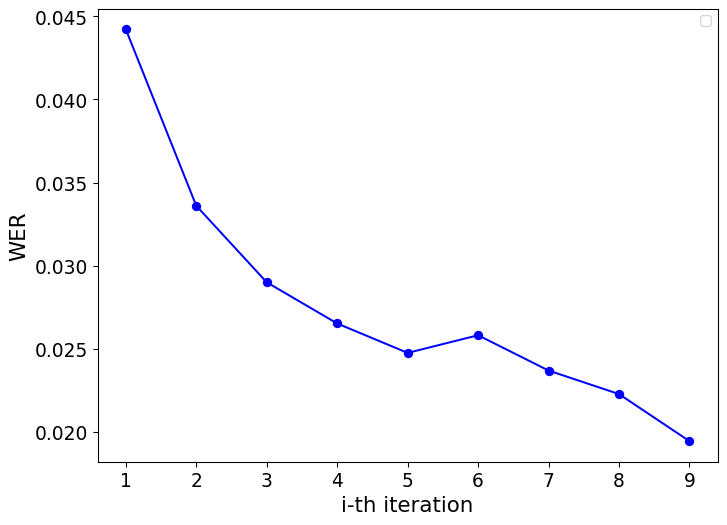

In [3]:
my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(iter, wer, color='blue', marker='o')
# plt.title('', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('WER', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq1.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

In [4]:
# wer = [0.042658] # first WER using original pretrained deepspeech
# iter = [0]
loss = []
iter = []

f = open(fpath, "r")
lines = f.readlines()
i = 0
for l in lines :
    if "Test on ../output/europarl-seed2021/fine_tune_data/test.csv" in l :
        token = l.split()
        for j in range(len(token)) :
            if token[j] == "loss:" :
                i += 1
                iter.append(i)
                loss.append(float(token[j+1].replace(",","")))
f.close()

loss

[7.629474,
 4.641132,
 4.082982,
 3.796425,
 3.596991,
 3.563578,
 3.260144,
 3.164884,
 3.078297]

No handles with labels found to put in legend.


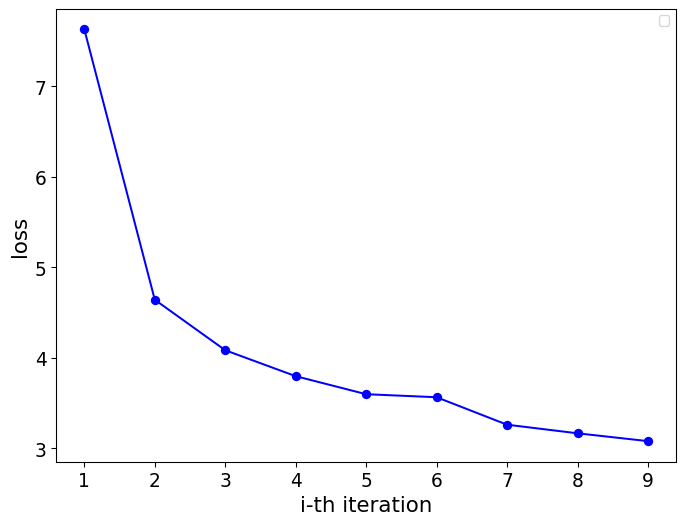

In [5]:
my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(iter, loss, color='blue', marker='o')
# plt.title('', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('loss', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq1-loss.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

## RQ2

Comparison of the number of failed test cases found with CrossASR++

In [6]:
def load_data(fpath) :
    with open(fpath) as f:
        data = json.load(f)
    return data

### Read result from old CrossASR++

In [7]:
# fpath = "output/europarl-seed2021/result/rv/deepspeech_deepspeech2_wav2letter_wit_wav2vec2/num_iteration_5/text_batch_size_1200/with-estimator-facebook-bart-base.json"


# def crossasr_offset_with_first_iteration(data) :
#     nftc = data["number_of_failed_test_cases_all"]
#     nftc_first = nftc[0]
#     for i in range(1, len(nftc)) :
#         nftc[i] -= nftc_first
#     del nftc[0]
#     data["number_of_failed_test_cases_all"] = nftc

#     nftc = data["number_of_processed_texts"]
#     nftc_first = nftc[0]
#     for i in range(1, len(nftc)) :
#         nftc[i] -= nftc_first
#     del nftc[0]
#     data["number_of_processed_texts"] = nftc

#     nftc = data["number_of_failed_test_cases_per_asr"]
#     for asr in ["deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] :
#         nftc_first = nftc[asr][0]
#         for i in range(1, len(nftc[asr])) :
#             nftc[asr][i] -= nftc_first
#         del nftc[asr][0]
#     data["number_of_failed_test_cases_per_asr"] = nftc

# data = load_data(fpath)
# crossasr_offset_with_first_iteration(data)
# del data["number_of_failed_test_cases_all"]
# del data["number_of_processed_texts"]
# crossasr = data


### Read result from ASREvolve

In [21]:
def offset_with_first_iteration(data):
    nftc = data["number_of_failed_test_cases_per_asr"]
    nftc_first = nftc[0]
    for i in range(1, len(nftc)) :
        for asr in ["deepspeech2", "wav2letter", "wav2vec2", "wit"] :
            nftc[i][asr] -= nftc_first[asr]
    del nftc[0]
    data["number_of_failed_test_cases_per_asr"] = nftc

def reformat_data(data, asrs): #match with crossasr format
    nftc = data["number_of_failed_test_cases_per_asr"]
    temp = {}
    for asr in asrs :
        ftc = []  
        for i in range(len(nftc)) :
            ftc.append(nftc[i][asr])
        temp[asr] = ftc
    data["number_of_failed_test_cases_per_asr"] = temp


fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-latest-rq2.json"

data = load_data(fpath)
offset_with_first_iteration(data)
data["number_of_failed_test_cases_per_asr"] = data["number_of_failed_test_cases_per_asr"]
asrs = ["deepspeech2", "finetuned_deepspeech", "wav2letter", "wav2vec2", "wit"] 
reformat_data(data, asrs)

asrevolve = data


### Result from CrossASR++


In [22]:

fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-original-rq2.json"

data = load_data(fpath)
offset_with_first_iteration(data)
data["number_of_failed_test_cases_per_asr"] = data["number_of_failed_test_cases_per_asr"]
asrs = ["deepspeech2", "deepspeech", "wav2letter", "wav2vec2", "wit"] 
reformat_data(data, asrs)

crossasr = data
crossasr

{'number_of_failed_test_cases_per_asr': {'deepspeech2': [54,
   110,
   166,
   209,
   276,
   337,
   386,
   439,
   511],
  'deepspeech': [137, 212, 283, 338, 413, 478, 549, 645, 731],
  'wav2letter': [107, 213, 317, 395, 509, 613, 712, 810, 923],
  'wav2vec2': [62, 127, 193, 249, 298, 360, 431, 491, 552],
  'wit': [236, 461, 691, 891, 1119, 1350, 1565, 1785, 2008]}}

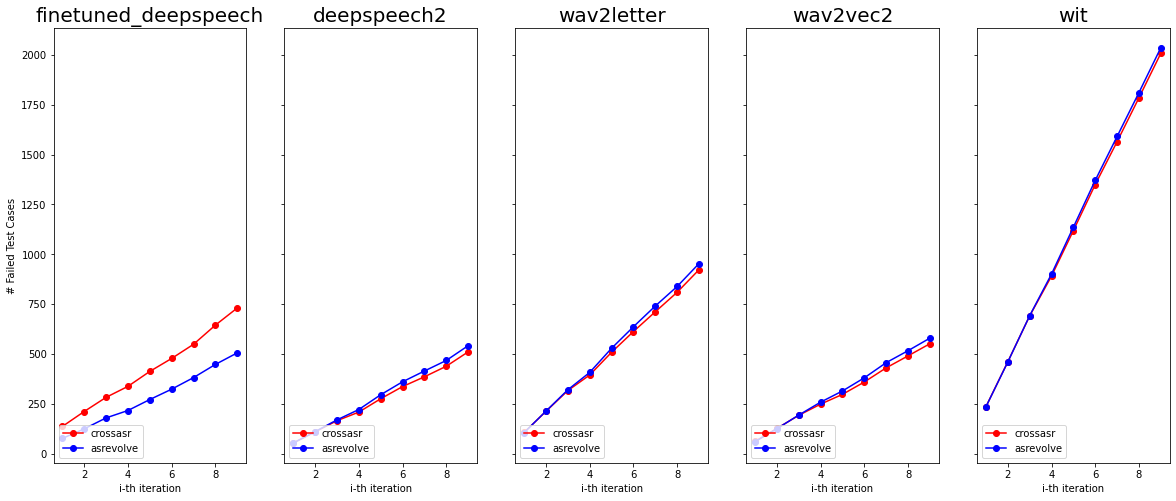

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8), sharey=True)

asrs = ["finetuned_deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 
iter = list(range(1,10))
for i, asr in enumerate(asrs) :
    asr_name = "deepspeech" if asr == "finetuned_deepspeech" else asr
    axs[i].plot(iter, crossasr["number_of_failed_test_cases_per_asr"][asr_name], marker='o', color="red", label="crossasr")
    axs[i].plot(iter, asrevolve["number_of_failed_test_cases_per_asr"][asr], marker='o', color="blue", label="asrevolve")
    fontdict = {"fontsize": 20}
    axs[i].set_title(asr, fontdict)
    axs[i].set_xlabel('i-th iteration')
    if i == 0 :axs[i].set_ylabel('# Failed Test Cases')
    axs[i].legend(loc='lower left')

### RQ2 Summary

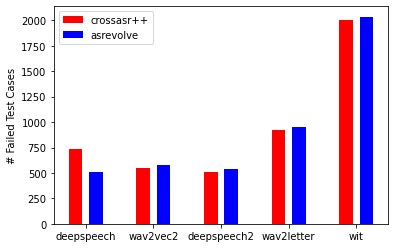

In [81]:
from matplotlib.dates import date2num
import datetime

asrs = ["deepspeech", "wav2vec2", "deepspeech2", "wav2letter", "wit"] 
x = np.array(list(range(1, len(asrs)+1)))

crossasr_summary = []
asrevolve_summary = []


for asr in asrs :
    crossasr_summary.append(crossasr["number_of_failed_test_cases_per_asr"][asr][-1])
    asr_name = asr
    if asr == "deepspeech" : asr_name = "finetuned_deepspeech"
    asrevolve_summary.append(asrevolve["number_of_failed_test_cases_per_asr"][asr_name][-1])

# print(x)

# crossasr_summary = [4, 9, 2, 2,1]
# asrevolve_summary = [11, 12, 13, 1,1]

fig, ax = plt.subplots()
ax.bar(x-0.15, crossasr_summary, width=0.2, color='r', align='center', label='crossasr++')
ax.bar(x, [0]*len(asrs), width=0.2, color='g', align='center', tick_label=asrs)
ax.bar(x+0.15, asrevolve_summary, width=0.2, color='b', align='center', label='asrevolve')
ax.set_ylabel("# Failed Test Cases")
ax.legend()
plt.show()

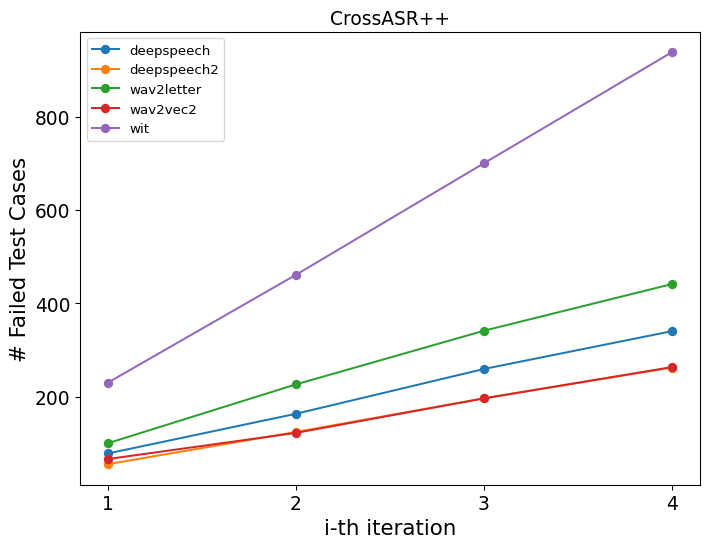

In [55]:
asrs = ["deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
for asr in asrs :
    plt.plot(iter, crossasr["number_of_failed_test_cases_per_asr"][asr], marker='o', label=asr)
plt.title('CrossASR++', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(iter, fontsize=14)
plt.ylabel('# Failed Test Cases', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq2.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

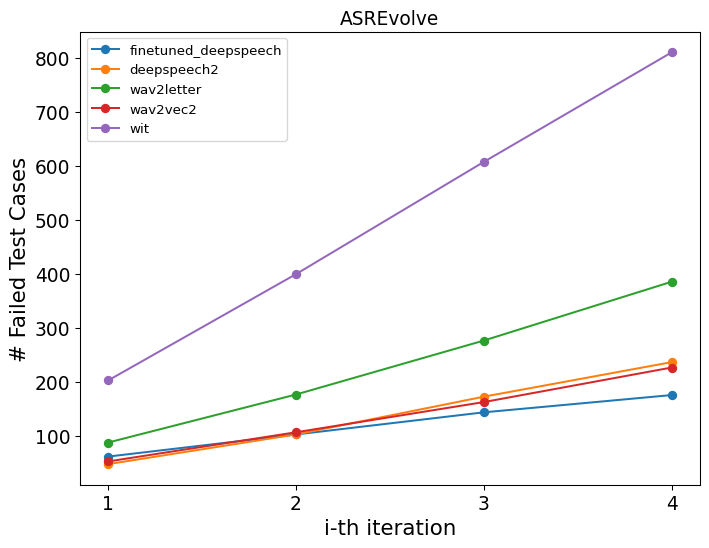

In [56]:
asrs = ["finetuned_deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
for asr in asrs :
    plt.plot(iter, asrevolve["number_of_failed_test_cases_per_asr"][asr], marker='o', label=asr)
plt.title('ASREvolve', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(iter, fontsize=14)
plt.ylabel('# Failed Test Cases', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq2.png", bbox_inches='tight', dpi=my_dpi)
plt.show()